# Analysis of multivariate random variables

NOTE. For this lab you need subsample with 5-10 random variables, at least half of them should be described with continuous random variable type. Target variable should be continuous.

Step 1. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV).

Step 2. You need to make an estimation of multivariate mathematical expectation and variance.

Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.

Step 4. You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

Step 6. Build regression model and make an analysis of multicollinearity and regularization (if needed).

Step 7. Analyze the quality of regression model (distribution of residuals, determination coefficient).

Table of contents:

1. Plotting a non-parametric estimation of PDF in form of a histogram and kernel density function for MRV (or probability law in case of discrete MRV).

2. Estimation of multivariate mathematical expectation and variance.

3. Non-parametric estimation of conditional distributions, mathematical expectations and variances.

4. Estimation of pair correlation coefficients, confidence intervals for them and significance levels.

5. Task formulation for regression, multivariate correlation.

6. Regression model, multicollinearity and regularization (if needed).

7. Quality analysis

## 

## Step 1. You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV).


In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
file = r'spotify_dataset.csv'
data = pd.read_csv(file)
data.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
variables = 'Danceability	Energy	Loudness	Valence Speechiness Acousticness Popularity Chord'
variables = variables.split()

N = len(data)
subdata = data[variables]
subdata = subdata[:N]
subdata = subdata.drop(subdata[subdata['Chord'] == " "].index)
cat_chord = subdata["Chord"].astype('category')
subdata["Chord"] = cat_chord.cat.codes
subdata

,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity,Chord
0,0.714,0.8,-4.808,0.589,0.0504,0.127,100,2
1,0.591,0.764,-5.484,0.478,0.0483,0.0383,99,4
2,0.563,0.664,-5.044,0.688,0.154,0.335,99,0
3,0.808,0.897,-3.712,0.591,0.0348,0.0469,98,2
4,0.736,0.704,-7.409,0.894,0.0615,0.0203,96,6
...,...,...,...,...,...,...,...,...
1551,0.762,0.7,-6.021,0.608,0.0694,0.00261,79,0
1552,0.528,0.87,-3.123,0.714,0.0851,0.24,66,2
1553,0.765,0.523,-4.333,0.394,0.03,0.184,81,5
1554,0.832,0.55,-7.026,0.881,0.0587,0.249,60,8


In [88]:
pd.DataFrame(cat_chord.cat.categories)

,0
0,A
1,A#/Bb
2,B
3,C
4,C#/Db
5,D
6,D#/Eb
7,E
8,F
9,F#/Gb


In [5]:
for col in subdata.columns:
    subdata[col] = pd.to_numeric(subdata[col], errors='coerce')
    subdata[col].fillna(subdata[col].mean(), inplace=True, downcast='infer')

subdata.dtypes

Danceability    float64
Energy          float64
Loudness        float64
Valence         float64
Speechiness     float64
Acousticness    float64
Popularity        int64
Chord              int8
dtype: object

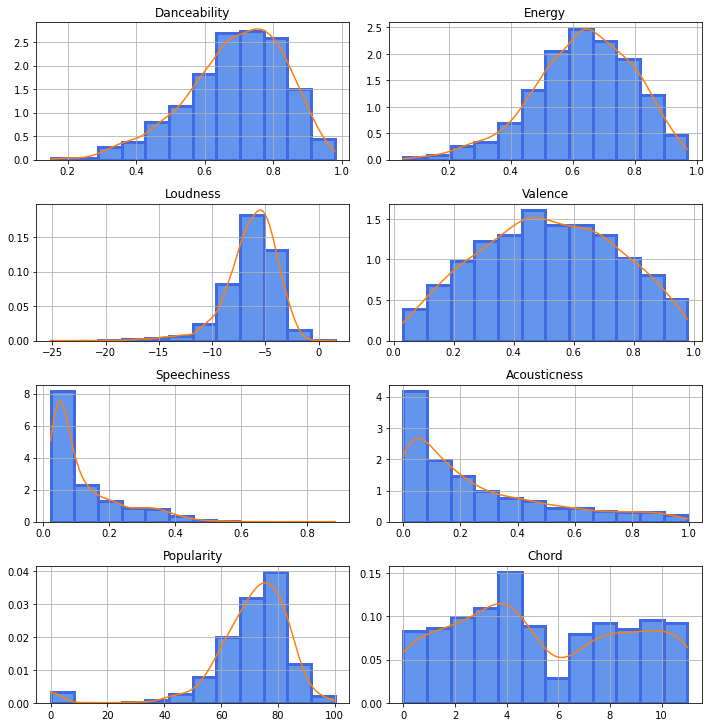

In [6]:
def plot_pdf_estimated(data,cols=2, kde=True,hist=True):
    plt.figure(figsize=(10,15))
    for i,col in enumerate(data.columns):
        m = 1 + 3.32*np.log10(len(data))
        m = int(np.round(m))
        N_cols = len(data.columns)
        plt.subplot(N_cols-cols,cols,i+1)
        
        if hist:
            data[col].hist(density=True,stacked=True,bins=m, facecolor='cornflowerblue', edgecolor='royalblue', linewidth=3)

        if kde:
            kernel = scipy.stats.gaussian_kde(data[col])
            min_amount, max_amount = data[col].min(), data[col].max()
            x = np.linspace(min_amount, max_amount, len(data[col]))
            kde_values = kernel(x)
            plt.plot(x,kde_values)

        plt.grid(True)
        plt.title(col)
    plt.tight_layout()
    
plot_pdf_estimated(subdata)
plt.savefig(fname = "./1.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)



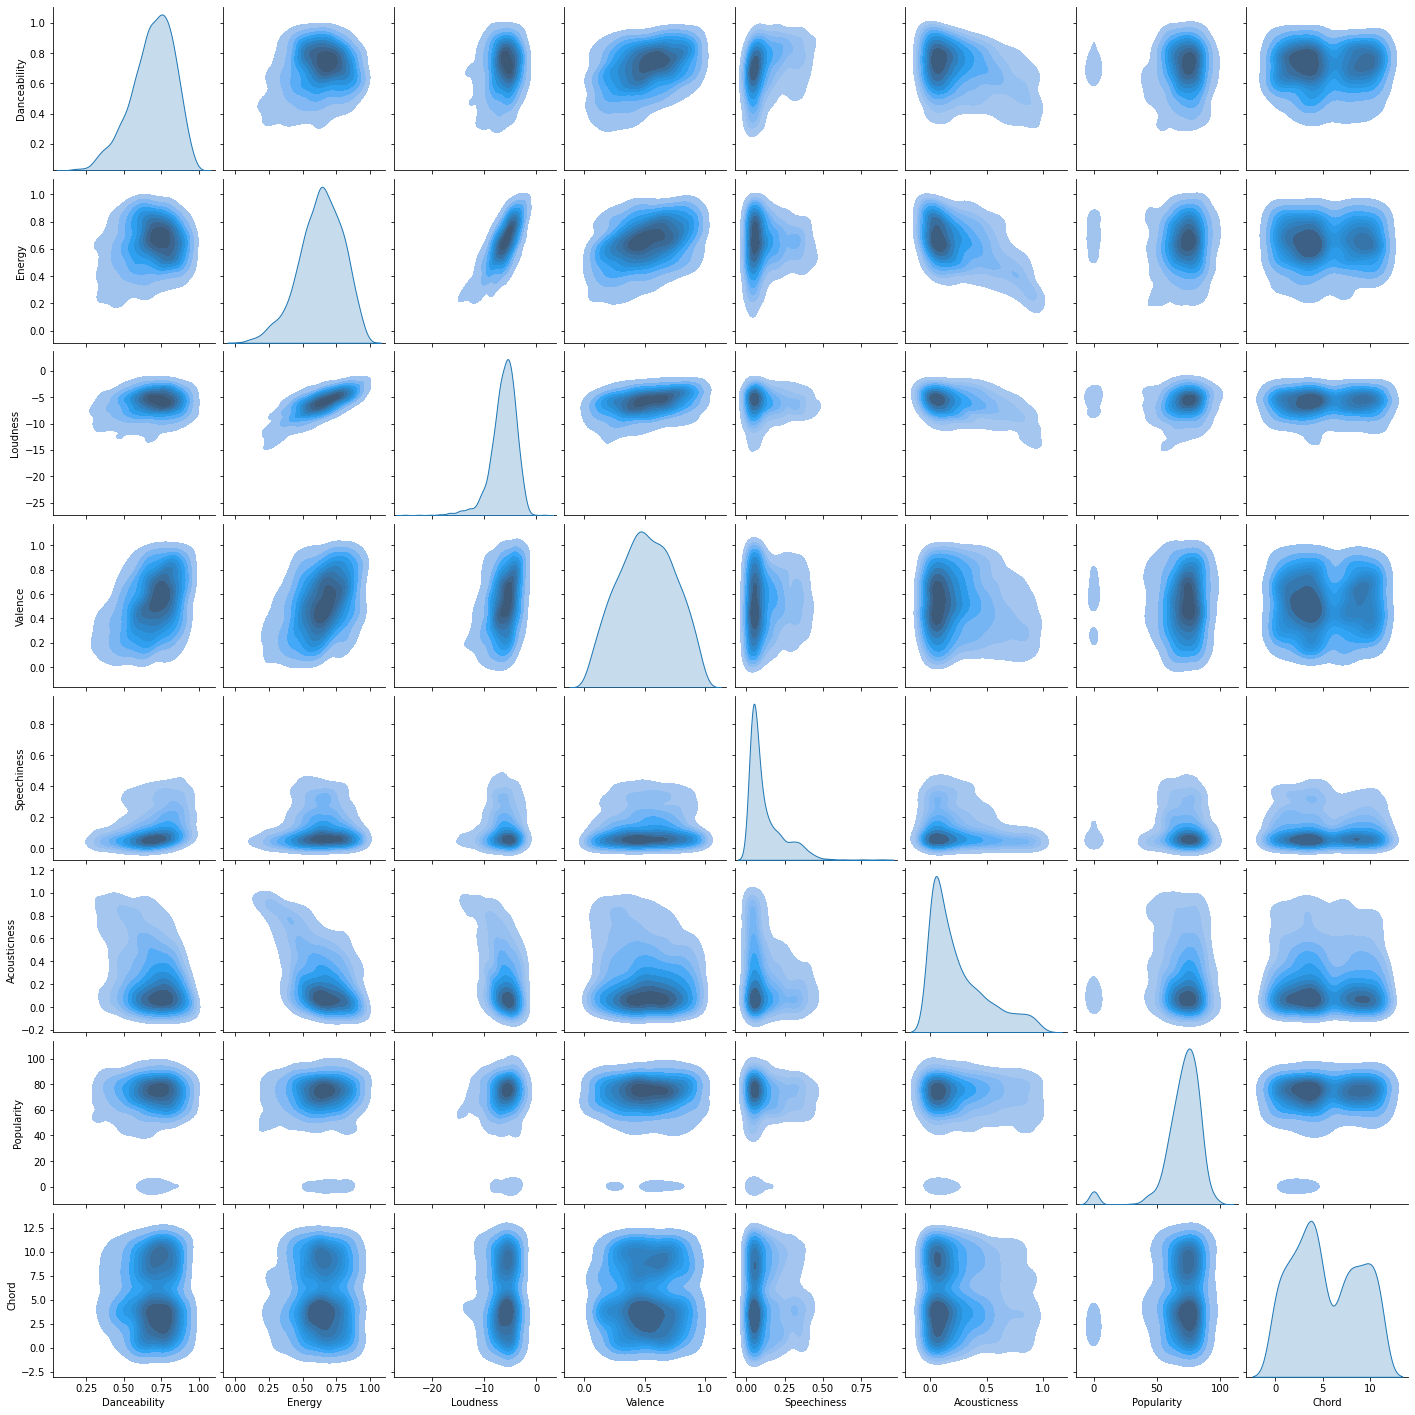

In [25]:
import seaborn as sns

plot_kws = {'fill':True}
sns.pairplot(subdata,kind="kde",plot_kws=plot_kws)
plt.savefig(fname = "./MRV_KDE.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

## Step 2. You need to make an estimation of multivariate mathematical expectation and variance.


In [8]:
subdata.mean()

Danceability     0.689997
Energy           0.633495
Loudness        -6.348474
Valence          0.514704
Speechiness      0.123656
Acousticness     0.248695
Popularity      70.089320
Chord            5.372816
dtype: float64

In [9]:
subdata.var()

Danceability      0.020290
Energy            0.026107
Loudness          6.296491
Valence           0.051677
Speechiness       0.012184
Acousticness      0.062663
Popularity      250.400048
Chord            11.964546
dtype: float64

## Step 3. You need to make a non-parametric estimation of conditional distributions, mathematical expectations and variances.


In [10]:
sd_conditional = subdata[subdata['Chord'] == 4]
sd_conditional = sd_conditional.drop(columns='Chord')
sd_conditional

,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity
1,0.591,0.764,-5.484,0.478,0.0483,0.03830,99
8,0.644,0.648,-4.601,0.440,0.1180,0.27600,96
9,0.750,0.608,-4.008,0.958,0.0387,0.00165,95
19,0.664,0.609,-6.509,0.194,0.0707,0.30400,90
24,0.514,0.730,-5.934,0.334,0.0598,0.00146,92
...,...,...,...,...,...,...,...
1521,0.499,0.800,-2.665,0.272,0.0502,0.09060,75
1522,0.757,0.673,-8.513,0.574,0.1410,0.09500,63
1524,0.785,0.753,-3.841,0.488,0.0873,0.18800,58
1530,0.697,0.683,-2.881,0.603,0.1170,0.03720,81


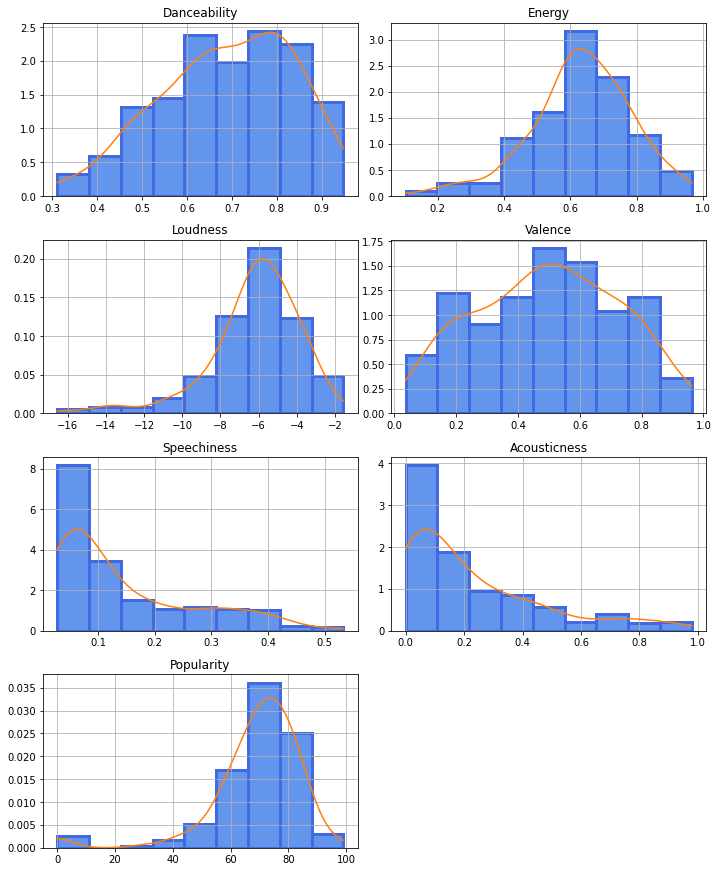

In [47]:
plot_pdf_estimated(sd_conditional,cols=2)
plt.savefig(fname = "./2.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

In [11]:
sd_conditional.mean()

Danceability     0.689561
Energy           0.631047
Loudness        -6.195336
Valence          0.496738
Speechiness      0.144232
Acousticness     0.225673
Popularity      69.032710
dtype: float64

In [12]:
pd.DataFrame(sd_conditional.var()).transpose()

,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity
0,0.021668,0.023091,5.772957,0.05259,0.014742,0.056513,263.684371


In [15]:
means = pd.DataFrame(columns=subdata.drop(columns='Chord').columns,index= range(np.max(subdata['Chord'].unique())))
vars =  pd.DataFrame(columns=subdata.drop(columns='Chord').columns,index= range(np.max(subdata['Chord'].unique())))
for i in range(np.max(subdata['Chord'].unique())):
    sd_conditional = subdata[subdata['Chord'] == i]
    sd_conditional = sd_conditional.drop(columns='Chord')
    # plot_pdf_estimated(sd_conditional,cols=2)
    # plt.savefig(fname = "./2"+'_'+str(i)+'.png', dpi=300, facecolor='w', edgecolor='w',
    #             orientation='portrait', papertype=None, format=None, 
    #             transparent=False, bbox_inches=None, pad_inches=0.1,
    #             frameon=None, metadata=None)
    means.loc[i] = sd_conditional.mean()
    vars.loc[i] = sd_conditional.var()



In [16]:
means

,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity
0,0.677831,0.629085,-6.305653,0.502992,0.120513,0.272687,71.076271
1,0.702566,0.665984,-6.198041,0.527445,0.140219,0.225093,67.385246
2,0.733674,0.646901,-6.35334,0.550333,0.13616,0.226209,68.808511
3,0.670832,0.597406,-6.77289,0.505798,0.094686,0.303755,69.03871
4,0.689561,0.631047,-6.195336,0.496738,0.144232,0.225673,69.03271
5,0.661752,0.639648,-6.433672,0.51207,0.135085,0.262219,69.944
6,0.6697,0.6189,-6.016425,0.530898,0.10374,0.287677,75.6
7,0.666205,0.606063,-6.830571,0.432311,0.111755,0.296532,71.4375
8,0.684939,0.642931,-6.278221,0.530272,0.108667,0.224733,71.114504
9,0.69976,0.660777,-5.819628,0.569992,0.120708,0.228043,72.264463


In [86]:
vars


,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity
0,0.021762,0.032542,6.635682,0.053852,0.013451,0.076485,161.74627
1,0.014993,0.02312,4.718401,0.048782,0.011979,0.060921,392.718128
2,0.016152,0.022216,4.409322,0.047595,0.013328,0.05399,375.698784
3,0.021939,0.030087,9.07121,0.054215,0.008332,0.071729,292.673817
4,0.021668,0.023091,5.772957,0.05259,0.014742,0.056513,263.684371
5,0.023323,0.030934,6.749783,0.056867,0.017685,0.061629,162.133935
6,0.020768,0.016409,4.948562,0.049338,0.011033,0.05926,163.066667
7,0.025968,0.032631,8.112384,0.054747,0.014296,0.089631,207.311374
8,0.017694,0.025401,6.802277,0.05207,0.007968,0.049114,132.22525
9,0.019333,0.020042,3.511883,0.046321,0.008828,0.053219,298.246143


## Step 4. You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.


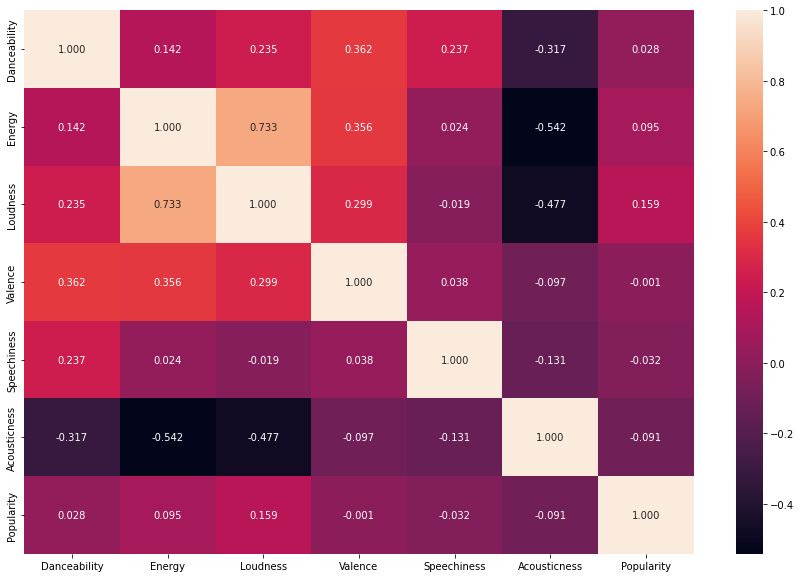

In [89]:
plt.figure(figsize=(15,10))
corr = subdata.drop(columns='Chord').corr()
sns.heatmap(corr, annot=True, fmt= '.3f')
plt.savefig(fname = "./3.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)


In [90]:
def conf_int_sign_corr(x,y):
    r, p = scipy.stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    alpha = 0.05
    z = scipy.stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = np.tanh(r_z-z*se), np.tanh(r_z+z*se)
    return r,lo_z,hi_z,p,alpha

def calc_conf_int_sign_corr(x):
    N_cols = len(x.columns)
    r,lo_z,hi_z,p,alpha = np.zeros((N_cols,N_cols)),np.zeros((N_cols,N_cols)),np.zeros((N_cols,N_cols)),np.zeros((N_cols,N_cols)),np.zeros((N_cols,N_cols))
    for i,col0 in enumerate(x.columns):
        for j,col1 in enumerate(x.columns):
            if i != j:
                r[i,j],lo_z[i,j],hi_z[i,j],p[i,j],alpha[i,j] = conf_int_sign_corr(x[col0],x[col1])
            else:
                r[i,j],lo_z[i,j],hi_z[i,j],p[i,j],alpha[i,j] = 1.0, 0.0, 0.0, 1.0, 0
        
    numbers = 4
    print('Correlation coefficient')
    display(pd.DataFrame(np.round(r,numbers).astype(str),index=x.columns, columns=x.columns))

    print('Confidence interval for the correlation coefficient')
    lo = np.round(lo_z,numbers).astype(str)
    hi = np.round(hi_z,numbers).astype(str)
    interval = np.core.defchararray.add(lo, '; ')
    interval = np.core.defchararray.add(interval, hi)
    display(pd.DataFrame(interval,index=x.columns, columns=x.columns))

    print('P-value')
    display(pd.DataFrame(np.round(p,numbers).astype(str),index=x.columns, columns=x.columns))
    print('Significance level')
    display(pd.DataFrame(np.round(alpha,numbers).astype(str),index=x.columns, columns=x.columns))

calc_conf_int_sign_corr(subdata.drop(columns='Chord'))



Correlation coefficient


,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity
Danceability,1.0,0.1421,0.2349,0.3616,0.2374,-0.3168,0.0284
Energy,0.1421,1.0,0.7326,0.3563,0.024,-0.5424,0.0947
Loudness,0.2349,0.7326,1.0,0.2988,-0.0188,-0.4774,0.1588
Valence,0.3616,0.3563,0.2988,1.0,0.038,-0.097,-0.001
Speechiness,0.2374,0.024,-0.0188,0.038,1.0,-0.1314,-0.0321
Acousticness,-0.3168,-0.5424,-0.4774,-0.097,-0.1314,1.0,-0.0912
Popularity,0.0284,0.0947,0.1588,-0.001,-0.0321,-0.0912,1.0


Confidence interval for the correlation coefficient


,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity
Danceability,0.0; 0.0,0.0929; 0.1906,0.1873; 0.2815,0.3175; 0.4042,0.1898; 0.2839,-0.361; -0.2712,-0.0215; 0.0782
Energy,0.0929; 0.1906,0.0; 0.0,0.7086; 0.7549,0.312; 0.3991,-0.0259; 0.0738,-0.5767; -0.5062,0.045; 0.1439
Loudness,0.1873; 0.2815,0.7086; 0.7549,0.0; 0.0,0.2527; 0.3435,-0.0686; 0.0311,-0.515; -0.438,0.1098; 0.207
Valence,0.3175; 0.4042,0.312; 0.3991,0.2527; 0.3435,0.0; 0.0,-0.0119; 0.0877,-0.1462; -0.0474,-0.0508; 0.0489
Speechiness,0.1898; 0.2839,-0.0259; 0.0738,-0.0686; 0.0311,-0.0119; 0.0877,0.0; 0.0,-0.1801; -0.0821,-0.0818; 0.0178
Acousticness,-0.361; -0.2712,-0.5767; -0.5062,-0.515; -0.438,-0.1462; -0.0474,-0.1801; -0.0821,0.0; 0.0,-0.1405; -0.0416
Popularity,-0.0215; 0.0782,0.045; 0.1439,0.1098; 0.207,-0.0508; 0.0489,-0.0818; 0.0178,-0.1405; -0.0416,0.0; 0.0


P-value


,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity
Danceability,1.0,0.0,0.0,0.0,0.0,0.0,0.264
Energy,0.0,1.0,0.0,0.0,0.346,0.0,0.0002
Loudness,0.0,0.0,1.0,0.0,0.4597,0.0,0.0
Valence,0.0,0.0,0.0,1.0,0.1351,0.0001,0.9701
Speechiness,0.0,0.346,0.4597,0.1351,1.0,0.0,0.2074
Acousticness,0.0,0.0,0.0,0.0001,0.0,1.0,0.0003
Popularity,0.264,0.0002,0.0,0.9701,0.2074,0.0003,1.0


Significance level


,Danceability,Energy,Loudness,Valence,Speechiness,Acousticness,Popularity
Danceability,0.0,0.05,0.05,0.05,0.05,0.05,0.05
Energy,0.05,0.0,0.05,0.05,0.05,0.05,0.05
Loudness,0.05,0.05,0.0,0.05,0.05,0.05,0.05
Valence,0.05,0.05,0.05,0.0,0.05,0.05,0.05
Speechiness,0.05,0.05,0.05,0.05,0.0,0.05,0.05
Acousticness,0.05,0.05,0.05,0.05,0.05,0.0,0.05
Popularity,0.05,0.05,0.05,0.05,0.05,0.05,0.0


## Step 5. Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).


#### Task: ***Predict*** popularity based on Danceability,Energy,Loudness,Valence,Speechiness,Acousticness
#### Multivariate correlation in the previous step

## Step 6. Build regression model and make an analysis of multicollinearity and regularization (if needed).


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab 


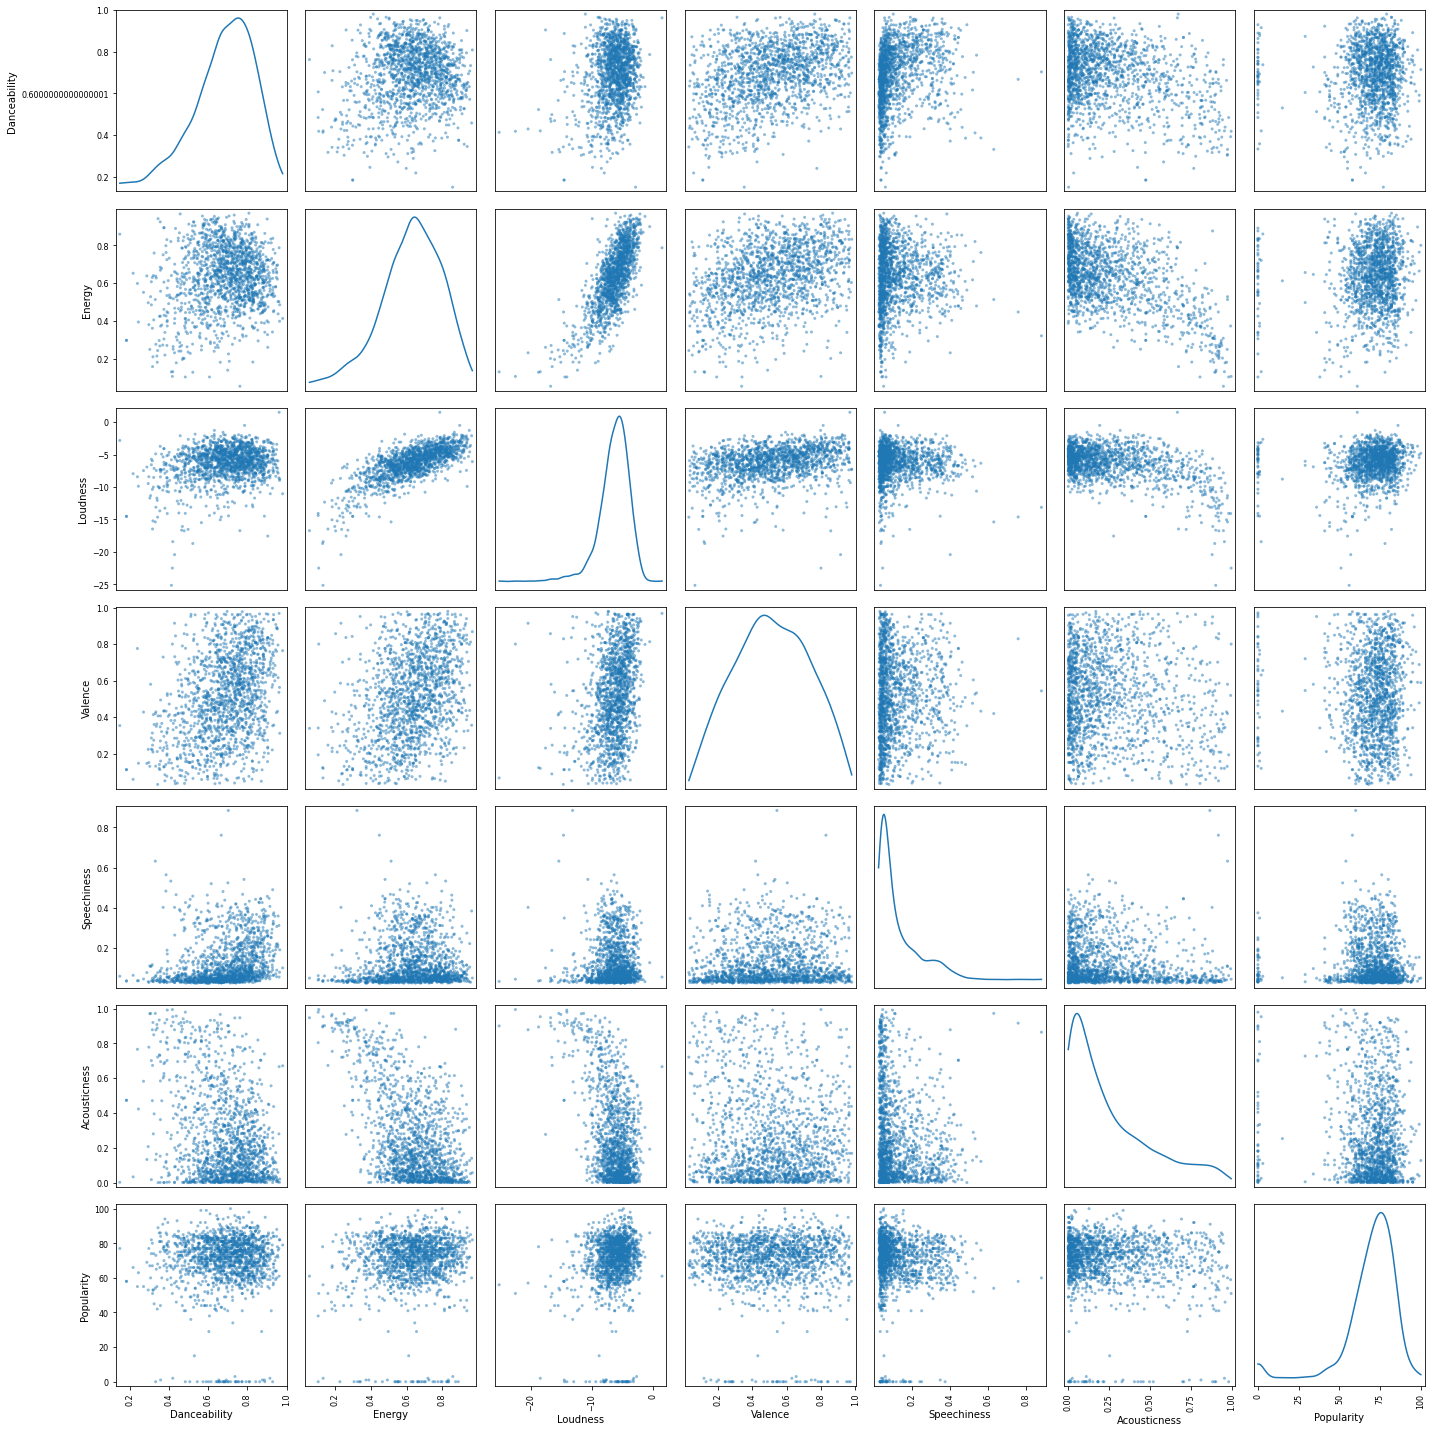

In [43]:
pd.plotting.scatter_matrix(subdata.drop(columns='Chord'), diagonal="kde",figsize=(20,20))
plt.tight_layout()
plt.savefig(fname = "./4.png", dpi=300, facecolor='w', edgecolor='w', color='cornflowerblue',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

In [111]:
y = subdata['Popularity']
# X = subdata.drop(columns=['Popularity','Danceability','Energy','Loudness'])
X = subdata.drop(columns=['Popularity','Chord'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2021)

reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


In [112]:
reg.coef_

array([-2.4859853 , -2.6448318 ,  1.11780692, -4.14981111, -0.79828181,
       -2.45168321])

In [113]:
#Построение и обучение полиномиальной регрессии 2-й степени
poly = PolynomialFeatures(2)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(2)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new, y_train)
y_pred_poly = reg.predict(X_test_new)
X_new = poly.fit_transform(X)
y_pred_poly_all = reg.predict(X_new)

In [114]:
reg.coef_

array([ 3.22911201e-11, -1.86859090e+01,  5.15264529e+01,  3.17514028e+00,
       -5.99744903e+01,  8.92987403e+01,  3.62687677e+01, -3.88350754e+00,
       -9.20580024e+00, -3.94823734e-01,  5.96446783e+01, -5.98571487e+01,
        1.09357477e+01, -4.63167563e+01, -2.22366772e+00,  3.60110237e+01,
       -6.63012418e+01, -4.30348415e+01,  7.95891669e-02, -7.95999902e-01,
        1.45711656e+00,  1.37079925e+00, -1.42651919e+01,  2.17521219e+01,
       -2.85557382e+00, -1.55398660e+01, -6.11838968e+00, -8.89263507e+00])

In [116]:
from sklearn.linear_model import  LassoLarsIC

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_train, y_train)
alpha_aic_ = model_aic.coef_
alpha_aic_

[-0.         -0.          1.03730338 -2.94974751 -0.         -0.        ]


array([ 0.        ,  0.        ,  0.91768112, -3.43460456,  0.        ,
       -1.0017877 ])

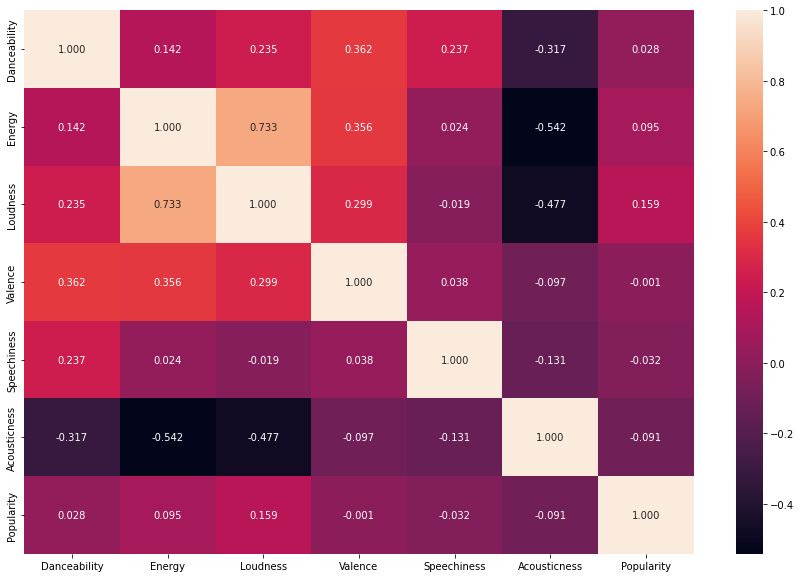

In [117]:
plt.figure(figsize=(15,10))
corr = X.join(y).corr()
sns.heatmap(corr, annot=True, fmt= '.3f')
plt.savefig(fname = "./5.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

## Step 7. Analyze the quality of regression model (distribution of residuals, determination coefficient).


In [123]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  9.359610990382969
Mean squared error =  180.57050695224223


In [124]:
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  9.46728918074564
Mean squared error =  186.3572862071119


In [125]:
y_pred_lasso = clf.predict(X_test)
y_pred_lasso_aic = model_aic.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso_aic = mean_squared_error(y_test, y_pred_lasso_aic)
mae_lasso_aic = mean_absolute_error(y_test, y_pred_lasso_aic)
print('Mean absolute error with lasso = ', mae_lasso)
print('Mean squared error with lasso = ', mse_lasso)
print('Mean absolute error with aic lasso = ', mae_lasso_aic)
print('Mean squared error with aic lasso = ', mse_lasso_aic)


Mean absolute error with lasso =  9.321246933616598
Mean squared error with lasso =  179.93888730404976
Mean absolute error with aic lasso =  9.347913897345952
Mean squared error with aic lasso =  180.25710786316512


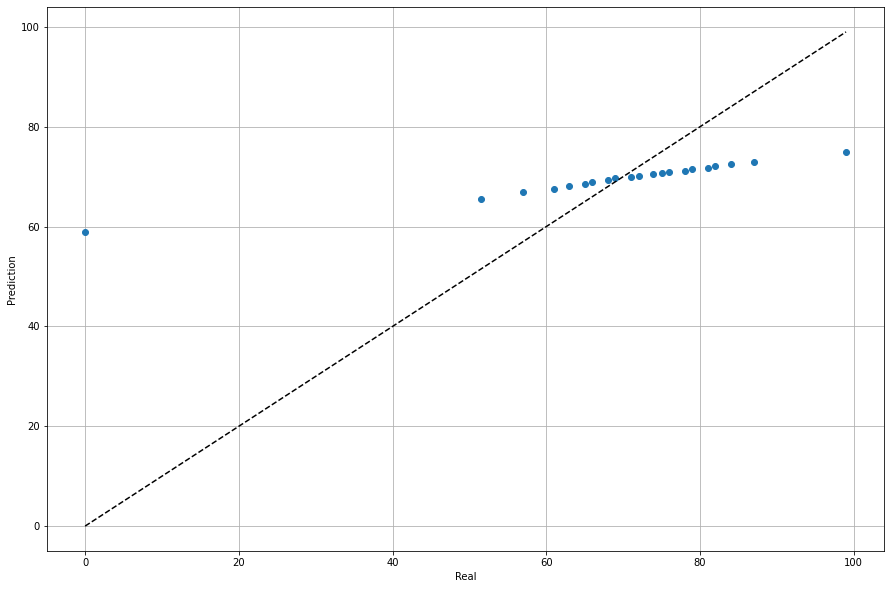

In [56]:
# Plotting a quantile biplot based on real and predicted values
plt.figure(figsize=(15,10))
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y_test, percs)
qn_second = np.percentile(y_pred, percs)
# plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Real')
plt.ylabel(u'Prediction')
plt.grid(True)
plt.savefig(fname = "./6.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

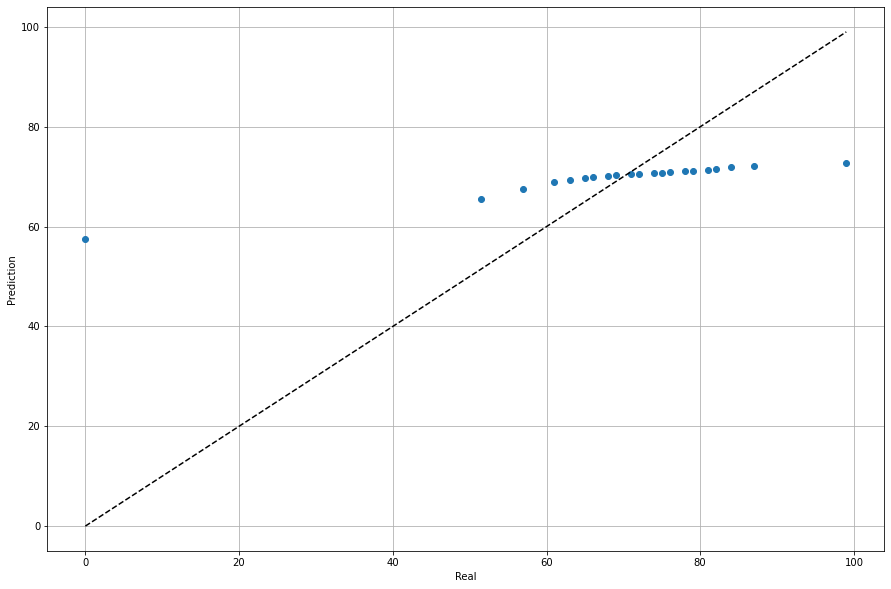

In [63]:
# Plotting a quantile biplot based on real and predicted values
plt.figure(figsize=(15,10))
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y_test, percs)
qn_second = np.percentile(y_pred_poly, percs)
# plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Real')
plt.ylabel(u'Prediction')
plt.grid(True)
plt.savefig(fname = "./7.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

0.9430188071111182
ShapiroResult(statistic=0.8570696711540222, pvalue=3.948633087933541e-21) 	<-----------  Not passed
Significance level 0.05


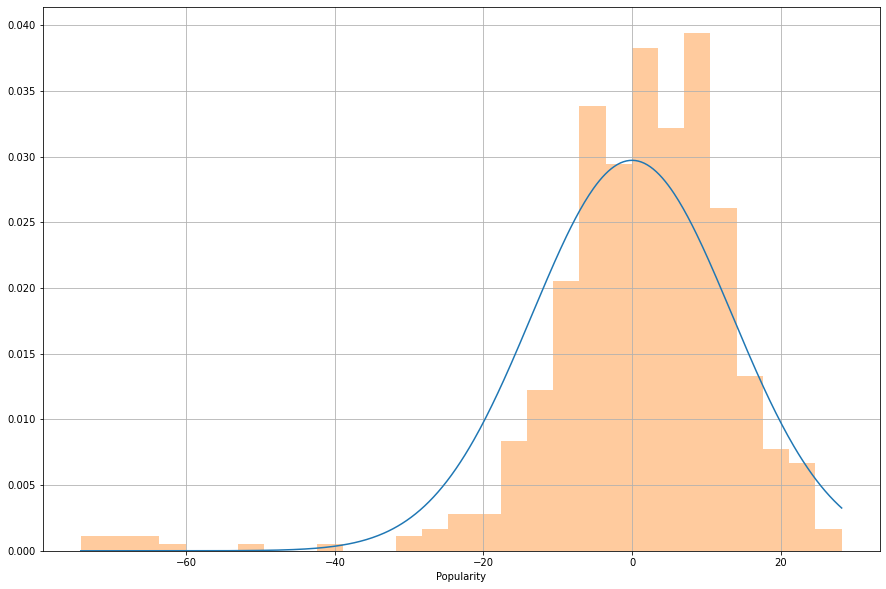

In [134]:
from scipy.stats import kstest, cramervonmises, norm
plt.figure(figsize=(15,10))
# The distribution of residuals
y_diff = y_test - y_pred
print(y_diff.mean())

params = (0.0, y_diff.std())
x = np.linspace(y_diff.min(), y_diff.max(), len(y_pred))
vals = norm.pdf(x,*params)

plt.plot(x,vals)
ax = plt.gca()
sns.distplot(y_diff, kde=False, ax=ax, norm_hist=True)
plt.grid(True)

alpha = 0.05
ks_res = shapiro(y_diff)
print(ks_res,'\t<----------- ', 'Passed' if ks_res.pvalue > alpha else 'Not passed')

print(f'Significance level {alpha}')

plt.savefig(fname = "./8.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)


0.6285630040203538
ShapiroResult(statistic=0.851222813129425, pvalue=1.5772911554966454e-21) 	<-----------  Not passed
Significance level 0.05


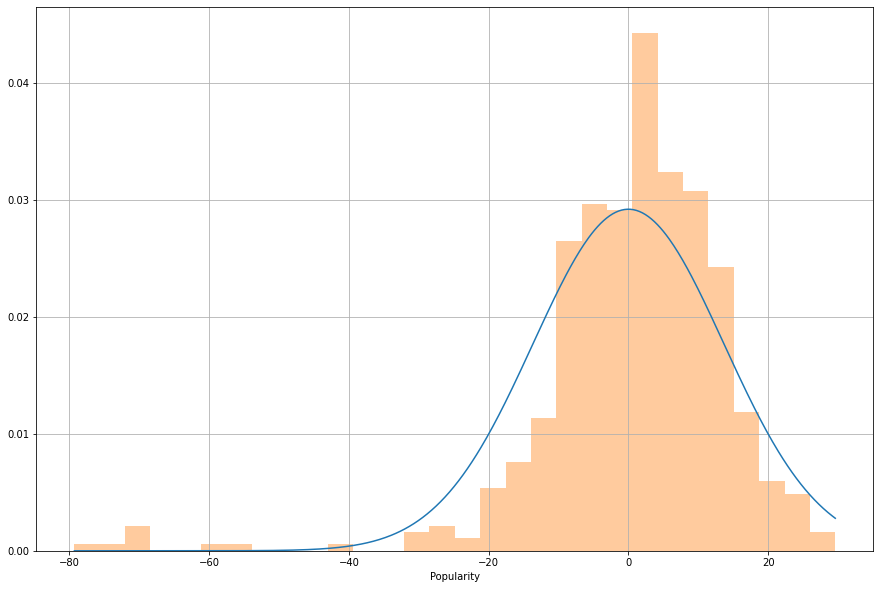

In [135]:
from scipy.stats import kstest, cramervonmises, norm, shapiro
plt.figure(figsize=(15,10))
# The distribution of residuals
y_diff = y_test - y_pred_poly
print(y_diff.mean())

params = (0.0, y_diff.std())
x = np.linspace(y_diff.min(), y_diff.max(), len(y_pred))
vals = norm.pdf(x,*params)

plt.plot(x,vals)
ax = plt.gca()
sns.distplot(y_diff, kde=False, ax=ax, norm_hist=True)
plt.grid(True)

alpha = 0.05
ks_res = shapiro(y_diff)
print(ks_res,'\t<----------- ', 'Passed' if ks_res.pvalue > alpha else 'Not passed')
print(f'Significance level {alpha}')

plt.savefig(fname = "./8.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)


0.9522429661448193
ShapiroResult(statistic=0.8564631342887878, pvalue=3.585476565215753e-21) 	<-----------  Not passed
Significance level 0.05


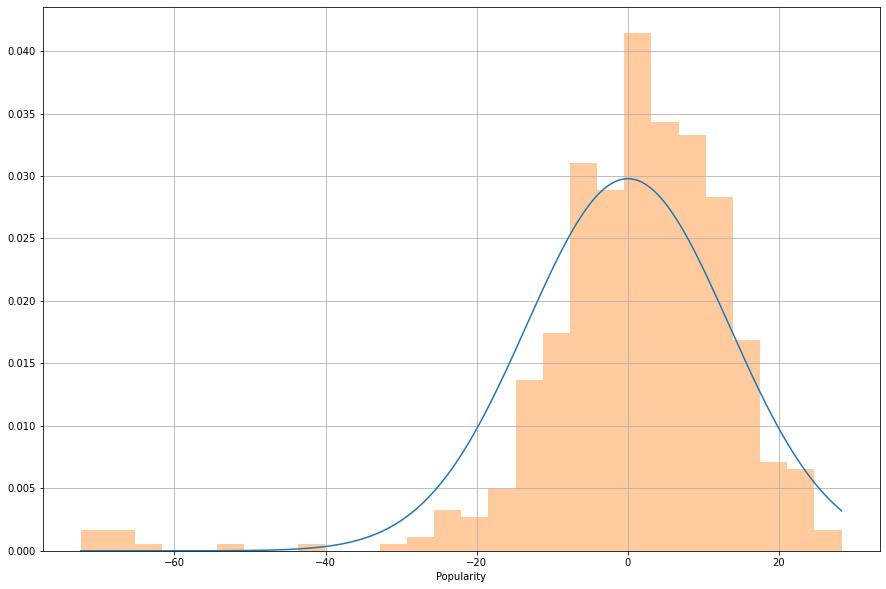

In [136]:
from scipy.stats import kstest, cramervonmises, norm, shapiro
plt.figure(figsize=(15,10))
# The distribution of residuals
y_diff = y_test - y_pred_lasso

print(y_diff.mean())
params = (0.0, y_diff.std())
x = np.linspace(y_diff.min(), y_diff.max(), len(y_pred))
vals = norm.pdf(x,*params)

plt.plot(x,vals)
ax = plt.gca()
sns.distplot(y_diff, kde=False, ax=ax, norm_hist=True)
plt.grid(True)

alpha = 0.05
ks_res = shapiro(y_diff)
print(ks_res,'\t<----------- ', 'Passed' if ks_res.pvalue > alpha else 'Not passed')
print(f'Significance level {alpha}')


plt.savefig(fname = "./8.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)


0.9470204307422181
ShapiroResult(statistic=0.8565431237220764, pvalue=3.63131925403674e-21) 	<-----------  Not passed
Significance level 0.05


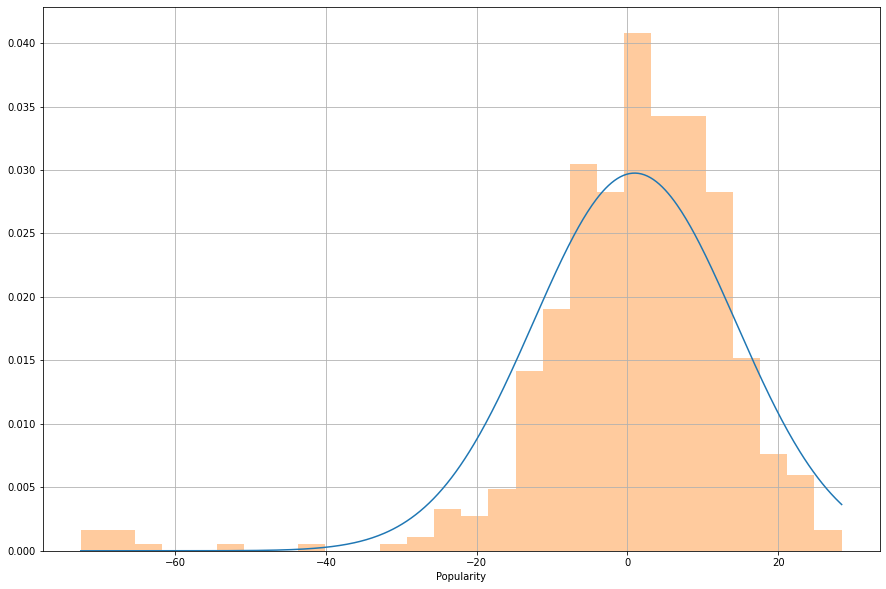

In [143]:
from scipy.stats import kstest, cramervonmises, norm, shapiro
plt.figure(figsize=(15,10))
# The distribution of residuals
y_diff = y_test - y_pred_lasso_aic

print(y_diff.mean())
params = (y_diff.mean(), y_diff.std())
x = np.linspace(y_diff.min(), y_diff.max(), len(y_pred))
vals = norm.pdf(x,*params)

plt.plot(x,vals)
ax = plt.gca()
sns.distplot(y_diff, kde=False, ax=ax, norm_hist=True)
plt.grid(True)

alpha = 0.05
ks_res = shapiro(y_diff)
print(ks_res,'\t<----------- ', 'Passed' if ks_res.pvalue > alpha else 'Not passed')
print(f'Significance level {alpha}')

plt.savefig(fname = "./8.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)


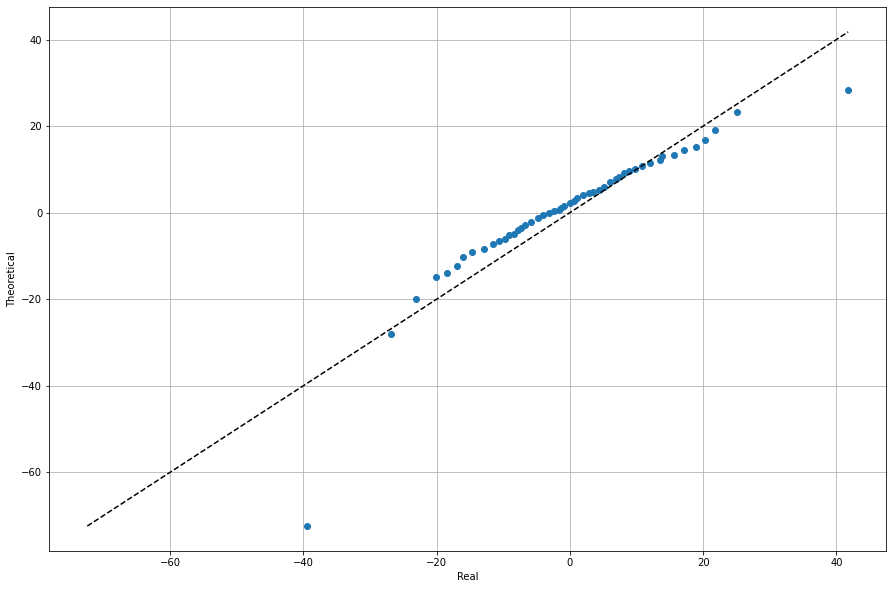

In [147]:
y_diff = y_test - y_pred_lasso

params = (0.0, y_diff.std())
x = np.linspace(y_diff.min(), y_diff.max(), len(y_pred))
vals = norm.pdf(x,*params)

# Plotting a quantile biplot based on real and predicted values
plt.figure(figsize=(15,10))
percs = np.linspace(0, 100, 50)
qn_first = np.percentile(norm.rvs(*params,size=y_pred.shape), percs)
qn_second = np.percentile(y_diff, percs)
# plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Real')
plt.ylabel(u'Theoretical')
plt.grid(True)
plt.savefig(fname = "./6.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

In [85]:
norm.rvs(size=y_pred.shape)
y_pred.shape

(510,)

In [65]:
np.corrcoef(y_test,y_pred)

array([[1.        , 0.08183751],
       [0.08183751, 1.        ]])

In [118]:
for col in X_test.columns:
    print(f'Correlation coefficient between {col} and Popularity')
    display(pd.DataFrame(np.corrcoef(y_pred,X_test[col]),columns=['Popularity',col],index=['Popularity',col]))
    

Correlation coefficient between Danceability and Popularity


,Popularity,Danceability
Popularity,1.000000,0.020616
Danceability,0.020616,1.000000


Correlation coefficient between Energy and Popularity


,Popularity,Energy
Popularity,1.000000,0.530689
Energy,0.530689,1.000000


Correlation coefficient between Loudness and Popularity


,Popularity,Loudness
Popularity,1.000000,0.864778
Loudness,0.864778,1.000000


Correlation coefficient between Valence and Popularity


,Popularity,Valence
Popularity,1.000000,-0.115992
Valence,-0.115992,1.000000


Correlation coefficient between Speechiness and Popularity


,Popularity,Speechiness
Popularity,1.000000,-0.066197
Speechiness,-0.066197,1.000000


Correlation coefficient between Acousticness and Popularity


,Popularity,Acousticness
Popularity,1.000000,-0.524811
Acousticness,-0.524811,1.000000


In [119]:
for col in X_test.columns:
    print(f'Correlation coefficient between {col} and Popularity')
    display(pd.DataFrame(np.corrcoef(y_pred_poly,X_test[col]),columns=['Popularity',col],index=['Popularity',col]))
    

Correlation coefficient between Danceability and Popularity


,Popularity,Danceability
Popularity,1.00000,-0.03389
Danceability,-0.03389,1.00000


Correlation coefficient between Energy and Popularity


,Popularity,Energy
Popularity,1.000000,0.332724
Energy,0.332724,1.000000


Correlation coefficient between Loudness and Popularity


,Popularity,Loudness
Popularity,1.000000,0.549596
Loudness,0.549596,1.000000


Correlation coefficient between Valence and Popularity


,Popularity,Valence
Popularity,1.000000,-0.087817
Valence,-0.087817,1.000000


Correlation coefficient between Speechiness and Popularity


,Popularity,Speechiness
Popularity,1.000000,-0.044318
Speechiness,-0.044318,1.000000


Correlation coefficient between Acousticness and Popularity


,Popularity,Acousticness
Popularity,1.000000,-0.249102
Acousticness,-0.249102,1.000000


In [126]:
from sklearn.metrics import r2_score

print(f'Determination coefficient = {r2_score(y_test,y_pred)}')
print(f'Determination coefficient = {r2_score(y_test,y_pred_poly)}')

Determination coefficient = 0.020020088560560145
Determination coefficient = -0.011385524224293286


In [120]:
for col in X_test.columns:
    print(f'Correlation coefficient between {col} and Popularity')
    display(pd.DataFrame(np.corrcoef(y_pred_lasso,X_test[col]),columns=['Popularity',col],index=['Popularity',col]))
    

Correlation coefficient between Danceability and Popularity


,Popularity,Danceability
Popularity,1.000000,0.025443
Danceability,0.025443,1.000000


Correlation coefficient between Energy and Popularity


,Popularity,Energy
Popularity,1.00000,0.57324
Energy,0.57324,1.00000


Correlation coefficient between Loudness and Popularity


,Popularity,Loudness
Popularity,1.000000,0.868589
Loudness,0.868589,1.000000


Correlation coefficient between Valence and Popularity


,Popularity,Valence
Popularity,1.000000,-0.089996
Valence,-0.089996,1.000000


Correlation coefficient between Speechiness and Popularity


,Popularity,Speechiness
Popularity,1.000000,-0.038799
Speechiness,-0.038799,1.000000


Correlation coefficient between Acousticness and Popularity


,Popularity,Acousticness
Popularity,1.000000,-0.503422
Acousticness,-0.503422,1.000000


In [121]:
for col in X_test.columns:
    print(f'Correlation coefficient between {col} and Popularity')
    display(pd.DataFrame(np.corrcoef(y_pred_lasso_aic,X_test[col]),columns=['Popularity',col],index=['Popularity',col]))
    

Correlation coefficient between Danceability and Popularity


,Popularity,Danceability
Popularity,1.000000,0.145855
Danceability,0.145855,1.000000


Correlation coefficient between Energy and Popularity


,Popularity,Energy
Popularity,1.000000,0.634653
Energy,0.634653,1.000000


Correlation coefficient between Loudness and Popularity


,Popularity,Loudness
Popularity,1.000000,0.924567
Loudness,0.924567,1.000000


Correlation coefficient between Valence and Popularity


,Popularity,Valence
Popularity,1.000000,-0.001088
Valence,-0.001088,1.000000


Correlation coefficient between Speechiness and Popularity


,Popularity,Speechiness
Popularity,1.000000,-0.009477
Speechiness,-0.009477,1.000000


Correlation coefficient between Acousticness and Popularity


,Popularity,Acousticness
Popularity,1.000000,-0.520784
Acousticness,-0.520784,1.000000


In [122]:
display(pd.DataFrame(np.corrcoef(y_pred_lasso_aic,y_diff),columns=['Predicted(lassoaic)','Residuals'],index=['Predicted','Residuals']))
display(pd.DataFrame(np.corrcoef(y_pred_lasso,y_diff),columns=['Predicted(lasso)','Residuals'],index=['Predicted','Residuals']))
display(pd.DataFrame(np.corrcoef(y_pred,y_diff),columns=['Predicted(linear)','Residuals'],index=['Predicted','Residuals']))
display(pd.DataFrame(np.corrcoef(y_pred_poly,y_diff),columns=['Predicted(poly2)','Residuals'],index=['Predicted','Residuals']))



,Predicted(lassoaic),Residuals
Predicted,1.000000,-0.001151
Residuals,-0.001151,1.000000


,Predicted(lasso),Residuals
Predicted,1.000000,-0.006137
Residuals,-0.006137,1.000000


,Predicted(linear),Residuals
Predicted,1.000000,-0.012882
Residuals,-0.012882,1.000000


,Predicted(poly2),Residuals
Predicted,1.000000,-0.012093
Residuals,-0.012093,1.000000


In [127]:
print(f'Determination coefficient = {r2_score(y_test,y_pred_lasso)}')
print(f'Determination coefficient = {r2_score(y_test,y_pred_lasso_aic)}')

Determination coefficient = 0.023447971537389645
Determination coefficient = 0.0217209466726781
